#### <h1><center>CMSC 478: Introduction to Machine Learning</center></h1>

<center><img src="img/title.jpg" align="center"/></center>


<h3 style="color:blue;"><center>Instructor: Fereydoon Vafaei</center></h3>


<h5 style="color:purple;"><center>Decision Trees</center></h5>

<center><img src="img/UMBC_logo.png" align="center"/></center>

<h1><center>Agenda</center></h1>

- <b> Decision Trees</b>
- <b> Learning Objectives:</b>
    - What is a decision tree?
    - Criterion: Gini and Entropy
    - CART Algorithm
    - Regularization Hyperparameters
    - Decision Trees for Regression
    - Decision Trees Limitations

<h1><center>What is a Decision Tree?</center></h1>

<center><img src="img/oz-tree.jpg" align="center"/></center>

<font size='1'>Wizard of Oz (1939) https://www.imdb.com/title/tt0032138/ </font>

<h1><center>What is a Decision Tree?</center></h1>

<center><img src="img/orange-lemon-1.png" align="center"/></center>

<font size='1'>From Zemel et al Slides (UOfT)</font>

<h1><center>Decision Tree Prediction</center></h1>

<center><img src="img/orange-lemon-2.png" align="center"/></center>

<font size='1'>From Zemel et al Slides (UOfT)</font>

<h1><center>Decision Tree - Decision Boundary</center></h1>

<center><img src="img/orange-lemon-3.png" align="center"/></center>

<font size='1'>From Zemel et al Slides (UOfT)</font>

<h1><center>Decision Tree - Tax Fraud Detection</center></h1>

<center><img src="img/tax-fraud-1.png" align="center"/></center>

<font size='1'>From Singh's Slides (CMU)</font>

<h1><center>Decision Tree - Tax Fraud Detection</center></h1>

<center><img src="img/tax-fraud-2.png" align="center"/></center>

<font size='1'>From Singh's Slides (CMU)</font>

<h1><center>Decision Tree - Tax Fraud Detection</center></h1>

<center><img src="img/tax-fraud-3.png" align="center"/></center>

<font size='1'>From Singh's Slides (CMU)</font>

<h1><center>Decision Tree - Tax Fraud Detection</center></h1>

<center><img src="img/tax-fraud-4.png" align="center"/></center>

<font size='1'>From Singh's Slides (CMU)</font>

<h1><center>Decision Tree - Tax Fraud Detection</center></h1>

<center><img src="img/tax-fraud-5.png" align="center"/></center>

<font size='1'>From Singh's Slides (CMU)</font>

<h1><center>Decision Tree - Tax Fraud Detection</center></h1>

<center><img src="img/tax-fraud-6.png" align="center"/></center>

<font size='1'>From Singh's Slides (CMU)</font>

<h1><center>Model Interpretation: White Box Versus Black Box</center></h1>

- Decision Trees are intuitive, and their decisions are easy to interpret. Such models are often called **white box models**.

- In contrast, as we will see, Random Forests or neural networks are generally considered **black box models**. They make great predictions, and you can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made.

- For example, if a neural network says that a particular person appears on a picture, it is hard to know what contributed to this prediction: did the model recognize that person’s eyes? Their mouth? Their nose? Their shoes? Or even the couch that they were sitting on?

- Conversely, Decision Trees provide nice, simple classification rules that can even be applied manually if need be (e.g., for flower classification).

<h1><center>Decision Trees in Scikit-learn</center></h1>

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import os

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join('./', "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
# $ dot -Tpng iris_tree.dot -o iris_tree.png

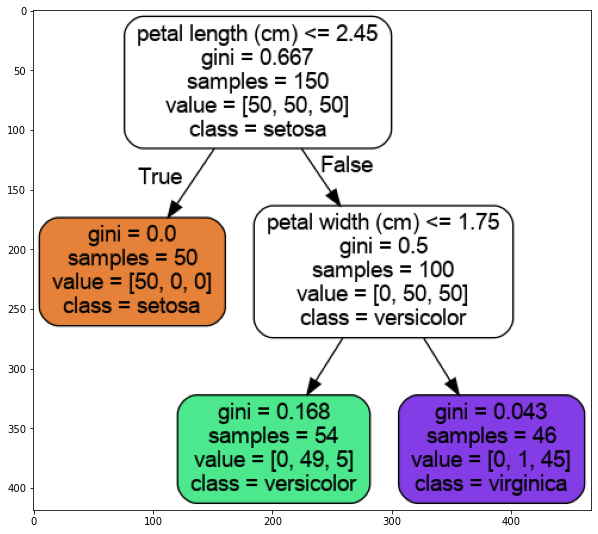

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

fig = plt.figure(figsize=(10,10))
img = mpimg.imread('iris_tree.png')
plt.imshow(img)

<h1><center>So Far...</center></h1>

- What does a decision tree represent?

- Given a decision tree, how do we assign label to a test point? 

<h1><center>Now...</center></h1>

- How do we learn a decision tree from training data?

- Which feature is the "best" to split?

<h1><center>Decision Tree - Play Tennis?</center></h1>

<img src="img/play-tennis.png" align="left"/>

<img src="img/play-tennis-dt-s.png" align="middle"/>

<img src="img/play-tennis-data-s.png" align="right"/>

<font size='1'>Image from Mausam's Slides (UW)</font>


<h1><center>The Dataset</center></h1>

<center><img src="img/play-tennis-data.png" align="center"/></center>

<font size='1'>Adapted from Carpuat's Slides (UMD)</font>

<h1><center>And The Tree! But How Is The Tree Built?</center></h1>

<img src="img/play-tennis-dt.png" align="center"/>

<font size='1'>Adapted from Carpuat's Slides (UMD)</font>

<h1><center>Learning Decision Trees</center></h1>

- Learning the simplest (smallest) decision tree is an NP-complete problem.


- Use a recursive and greedy heuristic.


    - Start from an empty decision tree.


    - Split on next best feature.


    - Recurse.


- What is the **best** feature?


- We use information theory to guide us for choosing the best split. <font color='blue'><b>Impurity: Gini & Entropy</b></font>

<h1><center>Choosing The Best Feature To Split: X1 or X2?</center></h1>

<center><img src="img/best-split.png" align="center"/></center>

<font size='1'>Adapted from Zemel et al Slides (UOfT)</font>

<h1><center>Choosing The Best Feature To Split: Balance or Employment?</center></h1>

<center><img src="img/information-gain.png" align="center"/></center>

<font size='1'>Adapted from Pedro Domingos Slides</font>

<h1><center>Impurity</center></h1>

<center><img src="img/impurity.png" align="center"/></center>

<font size='1'>Adapted from Pedro Domingos Slides</font>

<h1><center>Gini Index</center></h1>

**Equation 6-1: Gini impurity**

$
G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^2}
$


- $G_i$ Gini Index of node $i$

- $n$ Number of classes.

- $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i$th node.

- If perfectly classified by the split, Gini Index would be zero. 

- A feature with lower Gini index should be preferred.

- sklearn by default uses `gini`.

<h1><center>Entropy</center></h1>

**Equation 6-3: Entropy** 

$
H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})}
$

- $H_i$ Entropy of node $i$

- $n$ Number of classes.

- $p_{i,k}$ Probability of class $k$ instances among the training instances in the $i$th node.

- The lower the Entropy, the lower impurity. A smaller value of Entropy is better!

<h1><center>Computing Gini Index for Outlook</center></h1>

|  Outlook | Yes | No | Number of Instances |
|:--------:|:---:|:--:|:-------------------:|
|   Sunny  |  2  |  3 |          5          |
| Overcast |  4  |  0 |          4          |
|   Rain   |  3  |  2 |          5          |

Gini(Outlook=Sunny) = $1 – (2/5)^2 – (3/5)^2 = 1 – 0.16 – 0.36 = 0.48$

Gini(Outlook=Overcast) = $1 – (4/4)^2 – (0/4)^2 = 0$

Gini(Outlook=Rain) = $1 – (3/5)^2 – (2/5)^2 = 1 – 0.36 – 0.16 = 0.48$

Now, we compute the weighted average of all gini indexes for "Outlook" feature.

Gini(Outlook) = $(5/14) * 0.48 + (4/14) * 0 + (5/14) * 0.48 = 0.171 + 0 + 0.171 = 0.342$

<h1><center>Computing Gini Index for Temperature</center></h1>

| Temperature | Yes | No | Number of Instances |
|:-----------:|:---:|:--:|:-------------------:|
|     Hot     |  2  |  2 |          4          |
|     Cool    |  3  |  1 |          4          |
|     Mild    |  4  |  2 |          6          |

Gini(Temp=Hot) = $1 – (2/4)^2 – (2/4)^2 = 0.5$


Gini(Temp=Cool) = $1 – (3/4)^2 – (1/4)^2 = 1 – 0.5625 – 0.0625 = 0.375$


Gini(Temp=Mild) = $1 – (4/6)^2 – (2/6)^2 = 1 – 0.444 – 0.111 = 0.445$


Gini(Temp) = $(4/14) * 0.5 + (4/14) * 0.375 + (6/14) * 0.445 = 0.142 + 0.107 + 0.190 = 0.439$

**Exercise**: Compute Gini for Humidity and Wind.

<h1><center>Final Ranking of Features in terms of Gini Index</center></h1>

|   Feature   | Gini Index |
|:-----------:|:----------:|
|   Outlook   |    0.342   |
|   Humidity  |    0.367   |
|     Wind    |    0.428   |
| Temperature |    0.439   |

<h1><center>Building The Decision Tree -1</center></h1>

- After ranking features according to impurity, start with an empty tree and build it recursively, so the first node is the root to be selected for splitting.


- Outlook is selected as the root node because it has the lowest impurity according to Gini.


- The left and the right branches need further expansion.


- The middle branch (Outlook=overcast) has Gini=0 and is pure so no further expansion is needed for the middle branch.

<center><img src="img/dt-1.png" align="center"/></center>

<font size='1'>Image from [Furnkranz's Slides](http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf)</font>

<h1><center>Building The Decision Tree -2</center></h1>

- Next, for the left branch, humidity is selected as it has the 2nd lowest impurity according to Gini.


<center><img src="img/dt-2.png" align="center"/></center>

<font size='1'>Image from [Furnkranz's Slides](http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf)</font>

<h1><center>Building The Decision Tree -3</center></h1>

- After splitting humidity for the left branch, no further expansion is needed, so the recursion backtracks to expand the right branch.


- Windy is selected feature to split for the right branch because it has the 3rd lowest impurity according to Gini.

<center><img src="img/dt-3.png" align="center"/></center>

<font size='1'>Image from [Furnkranz's Slides](http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf)</font>

<h1><center>Building The Decision Tree - Final Tree</center></h1>

- Notice that in the tennis player data, Wind feature is represented by strong (true) and weak (false). 

<center><img src="img/dt-4.png" align="center"/></center>

<font size='1'>Image from [Furnkranz's Slides](http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf)</font>

<h1><center>CART Algorithm</center></h1>

- Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees).

- The algorithm works by first splitting the training set into two subsets using a single feature $k$ and a threshold $t_k$.

- How does it choose $k$ and $t_k$? It searches for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size).

- Equation 6-2 gives the cost function that the algorithm tries to minimize.

- Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively.

- It stops recursing once it reaches the maximum depth (defined by the `max_depth` hyperparameter), or if it cannot find a split that will reduce impurity.

**Equation 6-2: CART cost function for classification**

$
\begin{split}
&J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}\\
&\text{where }\begin{cases}
G_\text{left/right} \text{ measures the impurity of the left/right subset,}\\
m_\text{left/right} \text{ is the number of instances in the left/right subset.}
\end{cases}
\end{split}
$

<h1><center>Gini vs Entropy</center></h1>

- By default, the Gini impurity measure is used in scikit-learn, but you can select the entropy impurity measure instead by setting the `criterion` hyperparameter to `"entropy"` .


- The concept of entropy originated in thermodynamics as a measure of molecular disorder: entropy approaches zero when molecules are still and well ordered.


- Entropy later spread to a wide variety of domains, including Shannon’s information theory, where it measures the average information content of a message: entropy is zero when all messages are identical.


- In Machine Learning, entropy is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class.


- A reduction of entropy is often called an **information gain**.

<h1><center>Gini vs Entropy</center></h1>

- So, should you use Gini impurity or entropy?

- The truth is, most of the time it does not make a big difference: they lead to similar trees!

- Gini impurity is slightly faster to compute because entropy is more complex as it makes use of logarithms, so Gini is a good default.

- However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

- Gini’s maximum impurity is 0.5 and maximum purity is 0.

- Entropy’s maximum impurity is 1 and maximum purity is 0.

<h1><center>Gini vs Entropy</center></h1>

- Gini Index values vary inside the interval [0, 0.5] whereas the interval of the Entropy is [0, 1].

<center><img src="img/gini-vs-entropy.png" align="center"/></center>

<font size='1'>Image from: https://quantdare.com/decision-trees-gini-vs-entropy/</font>

<h1><center>Regularization Hyperparameters</center></h1>

- Decision Trees make very few assumptions about the training data (as opposed to linear models, which assume that the data is linear).

- If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely—indeed, most likely **overfitting** it. Such a model is often called a **nonparametric model**, not because it does not have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data.

- In contrast, a **parametric model**, such as a linear model, has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

- To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called **regularization**.

- The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree.

- In Scikit-Learn, this is controlled by the `max_depth` hyperparameter (the default value is `None`, which means unlimited).

- Reducing `max_depth` will regularize the model and thus reduce the risk of overfitting.

<h1><center>Overfitting in Decision Trees</center></h1>

<center><img src="img/dt-overfit.png" align="center"/></center>

<font size='1'>Image from Pedro Domingos' Slides</font>

<h1><center>DecisionTreeClassifier Hyperparameters</center></h1>

- The `DecisionTreeClassifier` class has a few other parameters that similarly restrict the shape of the Decision Tree:
    - `min_samples_split` the minimum number of samples a node must have before it can be split
    - `min_samples_leaf` the minimum number of samples a leaf node must have
    - `min_weight_fraction_leaf` same as `min_samples_leaf` but expressed as a fraction of the total number of weighted instances
    - `max_leaf_nodes` the maximum number of leaf nodes
    - `max_features` the maximum number of features that are evaluated for splitting at each node

- Increasing `min_*` hyperparameters or reducing `max_*` hyperparameters will regularize the model.

<h1><center>Impact of Regularization</center></h1>

- Figure 6-3 shows two Decision Trees trained on the same dataset.

- On the left the Decision Tree is trained with the default hyperparameters (i.e., no restrictions), and on the right it’s trained with `min_samples_leaf=4`.

- It is quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better.

<center><img src="img/fig-6-3.png" align="center"/></center>

<font size='1'>Image from Hands-On ML Textbook</font>

<h1><center>Decision Trees for Regression</center></h1>

- Decision Trees are also capable of performing regression tasks. Let’s build a regression tree using Scikit-Learn’s `DecisionTreeRegressor` class, training it on a noisy quadratic dataset with `max_depth=2`:

In [5]:
# Quadratic training set + noise
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [6]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [10]:
export_graphviz(
        tree_reg,
        out_file=os.path.join("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
!dot -Tpng regression_tree.dot -o regression_tree.png

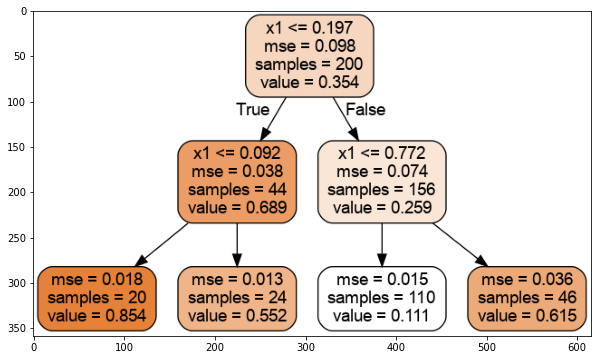

In [11]:
fig = plt.figure(figsize=(10,10))
img = mpimg.imread('regression_tree.png')
plt.imshow(img)

- This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, it predicts a value.

- For example, suppose you want to make a prediction for a new instance with $x_1 = 0.6$. You traverse the tree starting at the root, and you eventually reach the leaf node that predicts `value=0.111` .

- This prediction is the average target value of the 110 training instances associated with this leaf node, and it results in a mean squared error equal to 0.015 over these 110 instances.

<h1><center>Impact of max_depth</center></h1>

- This model’s predictions are represented on the left in Figure 6-5. If you set `max_depth=3`, you get the predictions represented on the right.

- Notice how the predicted value for each region is always the average target value of the instances in that region.

- The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

<center><img src="img/fig-6-5.png" align="center"/></center>

<font size='1'>Image from Hands-On ML Textbook</font>

<h1><center>CART Algorithm for Regression</center></h1>

- The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

- Equation 6-4 shows the cost function that the algorithm tries to minimize.

**Equation 6-4: CART cost function for regression**

$
J(k, t_k) = \dfrac{m_{\text{left}}}{m}\text{MSE}_\text{left} + \dfrac{m_{\text{right}}}{m}\text{MSE}_{\text{right}} \quad
\text{where }
\begin{cases}
\text{MSE}_{\text{node}} = \sum\limits_{\scriptstyle i \in \text{node}}(\hat{y}_{\text{node}} - y^{(i)})^2\\
\hat{y}_\text{node} = \dfrac{1}{m_{\text{node}}}\sum\limits_{\scriptstyle i \in \text{node}}y^{(i)}
\end{cases}
$


<h1><center>Impact of Regularization on Regression Decision Trees</center></h1>

- Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks.

- Without any regularization (i.e., using the default hyperparameters), you get the predictions on the left in Figure 6-6. These predictions are obviously overfitting the training set very badly.

- Just setting `min_samples_leaf=10` results in a much more reasonable model, represented on the right in Figure 6-6.

<center><img src="img/fig-6-6.png" align="center"/></center>

<font size='1'>Image from Hands-On ML Textbook</font>

<h1><center>Limitations of Decision Trees - Instability</center></h1>

- Decision Trees are simple to understand and interpret, easy to use, versatile, and powerful.

- However, they do have a few **limitations**: First, Decision Trees have orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.

- For example, Figure 6-7 below shows a simple linearly separable dataset: on the left, a Decision Tree can split it easily, while on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although both Decision Trees fit the training set perfectly, it is very likely that the model on the right will not generalize well.

- One way to limit this problem is to use **Principal Component Analysis (PCA)**, which often results in a better orientation of the training data.

- More generally, the main issue with Decision Trees is that they are very sensitive to small variations in the training data.

- **Random Forests** can limit this instability by averaging predictions over many trees.

<center><img src="img/fig-6-7.png" align="center"/></center>

<font size='1'>Image from Hands-On ML Textbook</font>

<h1><center>Decision Trees in X-Box</center></h1>

<center><img src="img/xbox-1.png" align="center"/></center>

<font size='1'>Adapted from Zemel et al Slides (UOfT) - J. Shotton, A. Fitzgibbon, M. Cook, T. Sharp, M. Finocchio, R. Moore, A. Kipman, A. Blake. Real-Time Human Pose</font>

<h1><center>Decision Trees in X-Box</center></h1>

<center><img src="img/xbox-2.png" align="center"/></center>

<font size='1'>Adapted from Zemel et al Slides (UOfT)</font>

<h1><center>Next Topic - Random Forests (Ensemble Methods)</center></h1>